# Importing libraries

In [87]:
import pandas as pd 
import statsmodels.api as sm
import numpy as np
from sklearn.linear_model import LogisticRegression
import statsmodels.api
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,recall_score,precision_score
from sklearn import metrics
from sklearn.utils.validation import column_or_1d
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

In [47]:
import os 
os.chdir('D:\\CV Nagwa\\Data Analysis\\CodeClause internship')

# Data Preprocessing

In [3]:
df=pd.read_excel('02 Churn-Dataset.xlsx')

In [110]:
pd.options.display.max_columns=100

In [111]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
0,5575-GNVDE,Male,0,No,No,34,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0,0,No
1,3668-QPYBK,Male,0,No,No,2,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,0,0,Yes
2,9237-HQITU,Female,0,No,No,2,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0,0,Yes
3,9305-CDSKC,Female,0,No,No,8,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,0,0,Yes
4,1452-KIOVK,Male,0,No,Yes,22,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,0,0,No
5,7892-POOKP,Female,0,Yes,No,28,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,0,2,Yes
6,6388-TABGU,Male,0,No,Yes,62,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,0,0,No
7,9763-GRSKD,Male,0,Yes,Yes,13,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Mailed check,49.95,587.45,1,0,No
8,8091-TTVAX,Male,0,Yes,No,58,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,0,0,No
9,0280-XJGEX,Male,0,No,No,49,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,5,4,Yes


In [6]:
df.shape

(4835, 22)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4835 entries, 0 to 4834
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        4835 non-null   object 
 1   gender            4835 non-null   object 
 2   SeniorCitizen     4835 non-null   int64  
 3   Partner           4835 non-null   object 
 4   Dependents        4835 non-null   object 
 5   tenure            4835 non-null   int64  
 6   MultipleLines     4835 non-null   object 
 7   InternetService   4835 non-null   object 
 8   OnlineSecurity    4835 non-null   object 
 9   OnlineBackup      4835 non-null   object 
 10  DeviceProtection  4835 non-null   object 
 11  TechSupport       4835 non-null   object 
 12  StreamingTV       4835 non-null   object 
 13  StreamingMovies   4835 non-null   object 
 14  Contract          4835 non-null   object 
 15  PaperlessBilling  4835 non-null   object 
 16  PaymentMethod     4835 non-null   object 


In [8]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
numAdminTickets     0
numTechTickets      0
Churn               0
dtype: int64

In [9]:
Columns=list(df.columns)

In [10]:
for i in Columns:
    print(i,df[i].unique())


customerID ['5575-GNVDE' '3668-QPYBK' '9237-HQITU' ... '2234-XADUH' '8361-LTMKD'
 '3186-AJIEK']
gender ['Male' 'Female']
SeniorCitizen [0 1]
Partner ['No' 'Yes']
Dependents ['No' 'Yes']
tenure [34  2  8 22 28 62 13 58 49 25 69 71 10 21 30 47 72 17 27  1  5 46 11 70
 63 52 43 15 60 18 66  9  3 31 64 56  7 42 35 65 12 38 68 55 37 33 67 23
 61 14 16 20 53  4 40  6 59 44 19 54 50 41 51 32 57 45 24 29 48 36 39 26
  0]
MultipleLines ['No' 'Yes']
InternetService ['DSL' 'Fiber optic']
OnlineSecurity ['Yes' 'No']
OnlineBackup ['No' 'Yes']
DeviceProtection ['Yes' 'No']
TechSupport ['No' 'Yes']
StreamingTV ['No' 'Yes']
StreamingMovies ['No' 'Yes']
Contract ['One year' 'Month-to-month' 'Two year']
PaperlessBilling ['No' 'Yes']
PaymentMethod ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']
MonthlyCharges [ 56.95  53.85  70.7  ... 108.35  44.2   78.7 ]
TotalCharges [1889.5 108.15 151.65 ... 7362.9 306.6 6844.5]
numAdminTickets [0 1 5 3 4 2]
numTechTickets [0

In [16]:
df['SeniorCitizen']=df['SeniorCitizen'].astype(str) 

# Exploratory Data Analysis

In [12]:
df.describe()

,tenure,MonthlyCharges,numAdminTickets,numTechTickets
count,4835.000000,4835.000000,4835.000000,4835.000000
mean,33.036194,81.755171,0.510651,0.521613
std,24.642309,18.303085,1.268162,1.386776
min,0.000000,42.900000,0.000000,0.000000
25%,9.000000,69.775000,0.000000,0.000000
50%,30.000000,82.500000,0.000000,0.000000
75%,56.000000,95.700000,0.000000,0.000000
max,72.000000,118.750000,5.000000,8.000000


In [13]:
df.groupby('Churn').describe()

tenure                                                     \
        count       mean        std  min   25%   50%   75%   max   
Churn                                                              
No     3249.0  39.935365  23.834484  0.0  18.0  42.0  63.0  72.0   
Yes    1586.0  18.902900  19.759294  1.0   3.0  11.0  31.0  72.0   

      MonthlyCharges                                                      \
               count      mean        std    min      25%     50%    75%   
Churn                                                                      
No            3249.0  81.51362  18.883664  43.45  68.1500  81.500  95.95   
Yes           1586.0  82.25000  17.047215  42.90  72.2125  84.125  95.45   

              numAdminTickets                                               \
          max           count      mean       std  min  25%  50%  75%  max   
Churn                                                                        
No     118.75          3249.0  0.522930  1.278438  0.0  0.0  0.0  0.0  5.0   
Yes    118.35          1586.0  0.485498  1.246868  0.0  0.0  0.0  0.0  5.0   

      numTechTickets                                               
               count      mean       std  min  25%  50%  75%  max  
Churn                                                              
No            3249.0  0.159434  0.733902  0.0  0.0  0.0  0.0  7.0  
Yes           1586.0  1.263556  1.985409  0.0  0.0  0.0  2.0  8.0

In [14]:
churn_count=df['Churn'].value_counts()
churn_labels=['No','Yes']

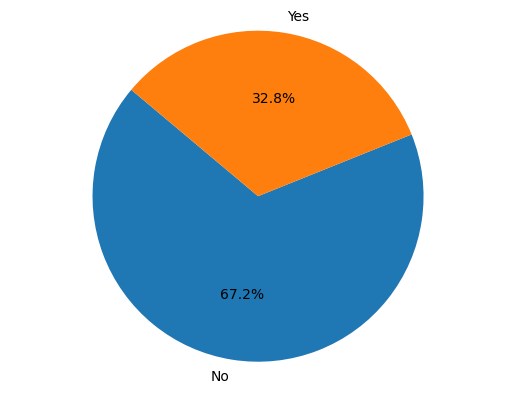

In [15]:
plt.pie(churn_count,labels=churn_labels,autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.show()

Text(0, 0.5, 'Percentage of Churners')

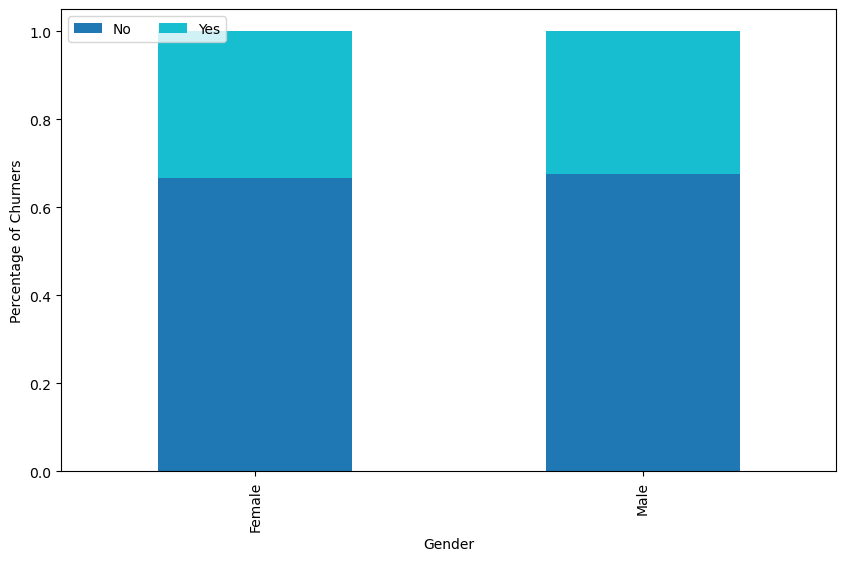

In [16]:
cross_tab_gender=pd.crosstab(index=df['gender'],columns=df['Churn'],normalize='index')
cross_tab_gender.plot(kind='bar',stacked=True,colormap='tab10',figsize=(10,6))
plt.legend(loc='upper left',ncol=2)
plt.xlabel('Gender')
plt.ylabel('Percentage of Churners')

Text(0, 0.5, 'Churn')

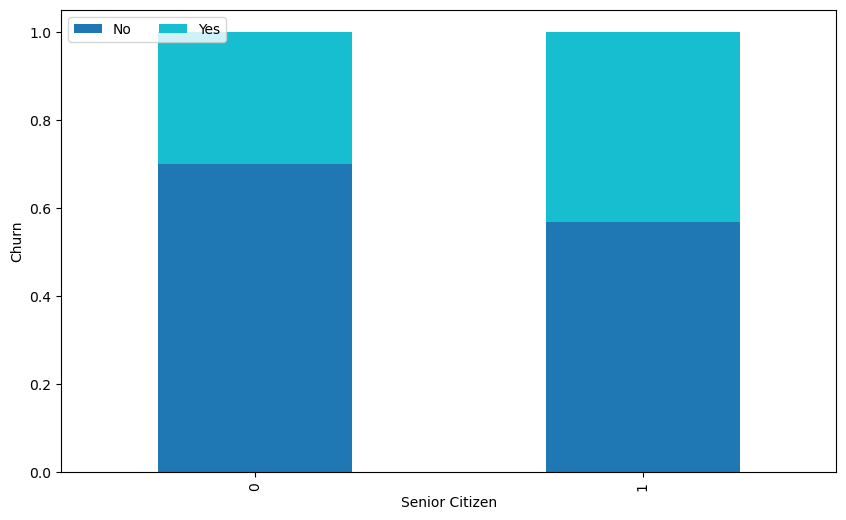

In [17]:
tabs_SeniorCitizen=pd.crosstab(index=df['SeniorCitizen'],columns=df['Churn'],normalize='index')
tabs_SeniorCitizen.plot(kind='bar',stacked=True,colormap='tab10',figsize=(10,6))
plt.legend(loc='upper left',ncol=2)
plt.xlabel('Senior Citizen')
plt.ylabel('Churn')

Text(0, 0.5, 'Churn')

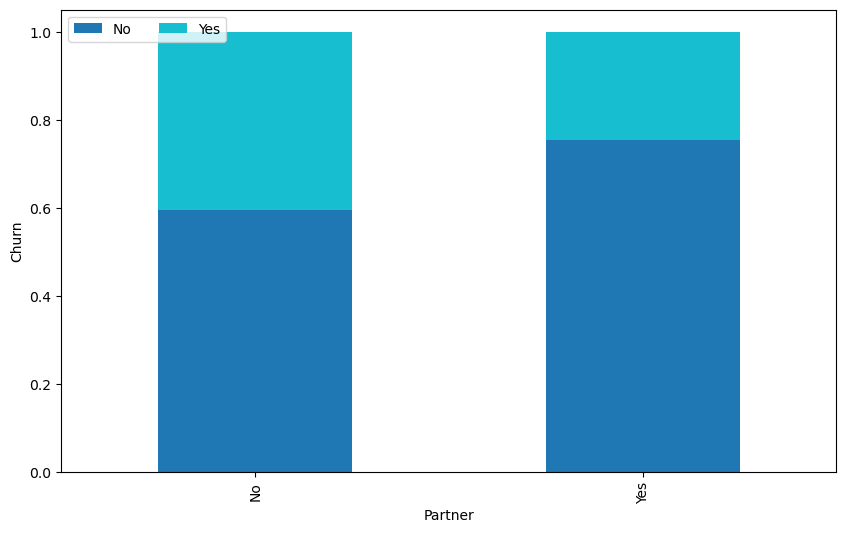

In [18]:
tabs_Partner=pd.crosstab(index=df['Partner'],columns=df['Churn'],normalize='index')
tabs_Partner.plot(kind='bar',stacked=True,colormap='tab10',figsize=(10,6))
plt.legend(loc='upper left',ncol=2)
plt.xlabel('Partner')
plt.ylabel('Churn')

Text(0, 0.5, 'Churn')

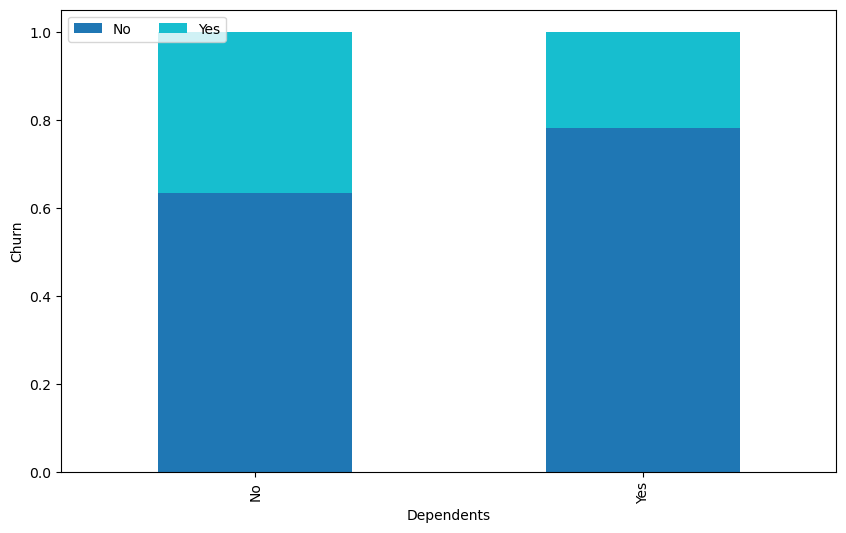

In [19]:
tabs_Dependents=pd.crosstab(index=df['Dependents'],columns=df['Churn'],normalize='index')
tabs_Dependents.plot(kind='bar',stacked=True,colormap='tab10',figsize=(10,6))
plt.legend(loc='upper left',ncol=2)
plt.xlabel('Dependents')
plt.ylabel('Churn')

Text(0, 0.5, 'Churn')

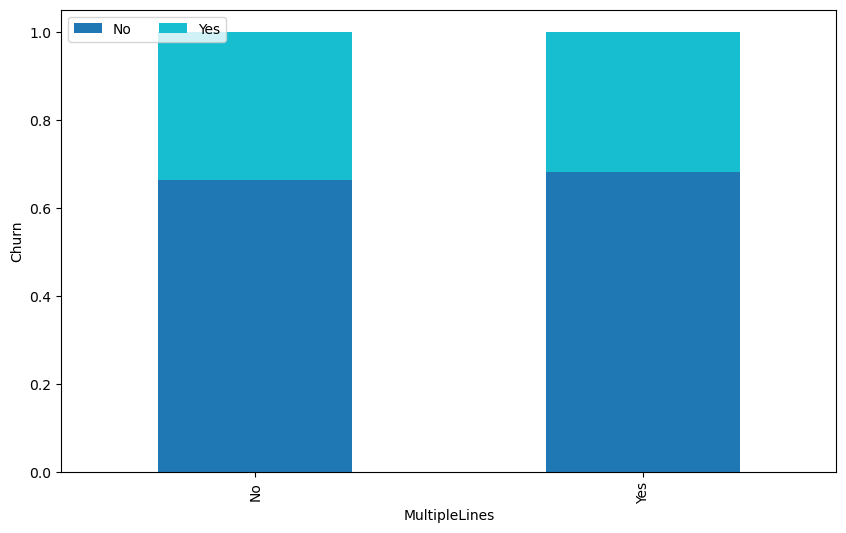

In [20]:
tabs_MultipleLines=pd.crosstab(index=df['MultipleLines'],columns=df['Churn'],normalize='index')
tabs_MultipleLines.plot(kind='bar',stacked=True,colormap='tab10',figsize=(10,6))
plt.legend(loc='upper left',ncol=2)
plt.xlabel('MultipleLines')
plt.ylabel('Churn')

Text(0, 0.5, 'Churn')

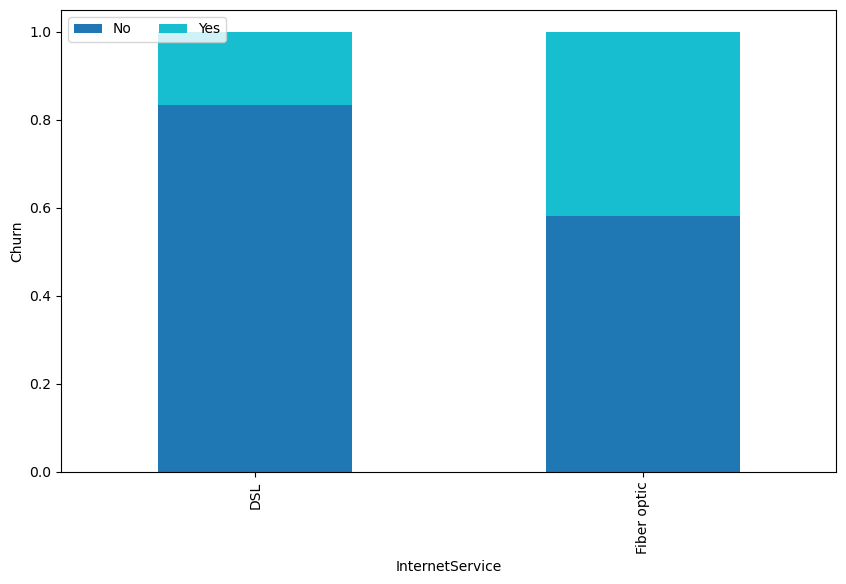

In [21]:
tabs_InternetService=pd.crosstab(index=df['InternetService'],columns=df['Churn'],normalize='index')
tabs_InternetService.plot(kind='bar',stacked=True,colormap='tab10',figsize=(10,6))
plt.legend(loc='upper left',ncol=2)
plt.xlabel('InternetService')
plt.ylabel('Churn')

Text(0, 0.5, 'Churn')

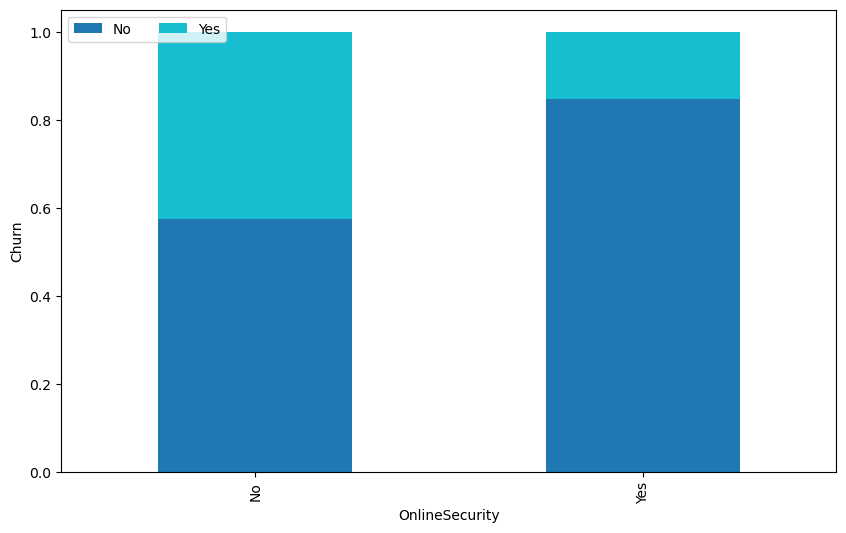

In [22]:
tabs_OnlineSecurity=pd.crosstab(index=df['OnlineSecurity'],columns=df['Churn'],normalize='index')
tabs_OnlineSecurity.plot(kind='bar',stacked=True,colormap='tab10',figsize=(10,6))
plt.legend(loc='upper left',ncol=2)
plt.xlabel('OnlineSecurity')
plt.ylabel('Churn')

Text(0, 0.5, 'Churn')

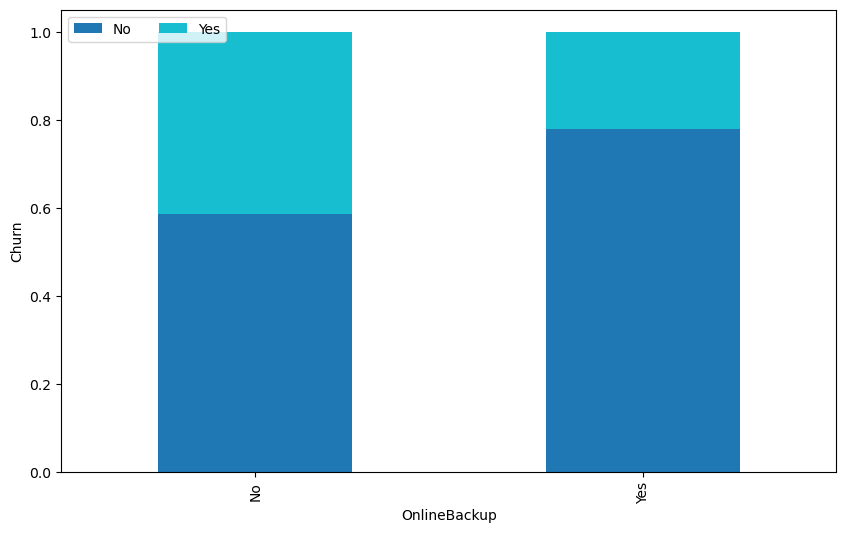

In [23]:
tabs_OnlineBackup=pd.crosstab(index=df['OnlineBackup'],columns=df['Churn'],normalize='index')
tabs_OnlineBackup.plot(kind='bar',stacked=True,colormap='tab10',figsize=(10,6))
plt.legend(loc='upper left',ncol=2)
plt.xlabel('OnlineBackup')
plt.ylabel('Churn')

Text(0, 0.5, 'Churn')

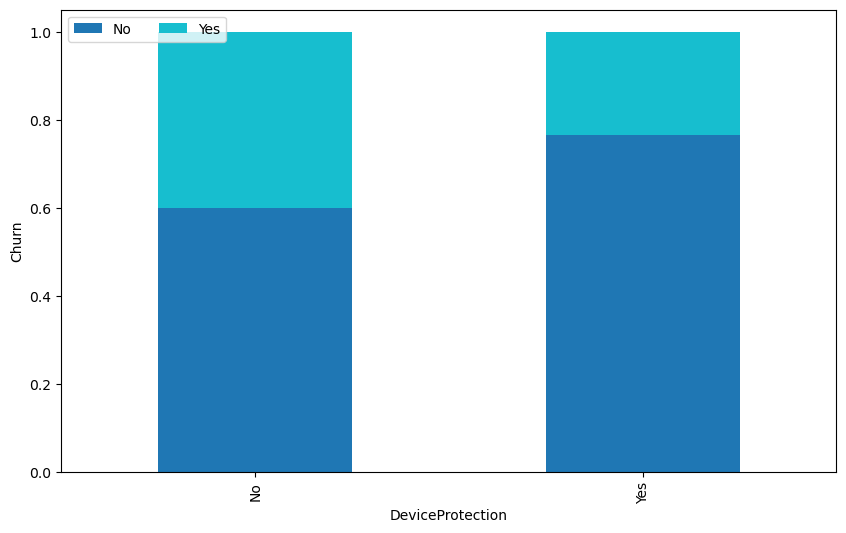

In [24]:
tabs_DeviceProtection=pd.crosstab(index=df['DeviceProtection'],columns=df['Churn'],normalize='index')
tabs_DeviceProtection.plot(kind='bar',stacked=True,colormap='tab10',figsize=(10,6))
plt.legend(loc='upper left',ncol=2)
plt.xlabel('DeviceProtection')
plt.ylabel('Churn')

Text(0, 0.5, 'Churn')

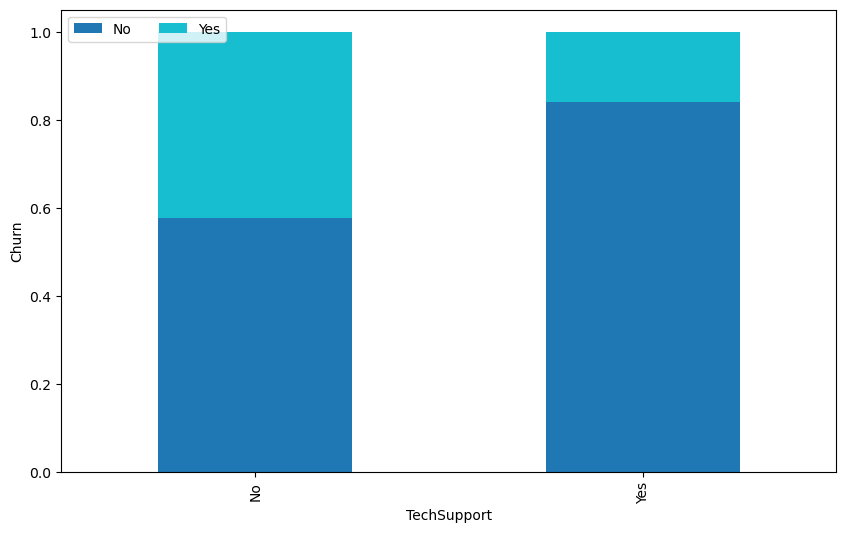

In [25]:
tabs_TechSupport=pd.crosstab(index=df['TechSupport'],columns=df['Churn'],normalize='index')
tabs_TechSupport.plot(kind='bar',stacked=True,colormap='tab10',figsize=(10,6))
plt.legend(loc='upper left',ncol=2)
plt.xlabel('TechSupport')
plt.ylabel('Churn')

Text(0, 0.5, 'Churn')

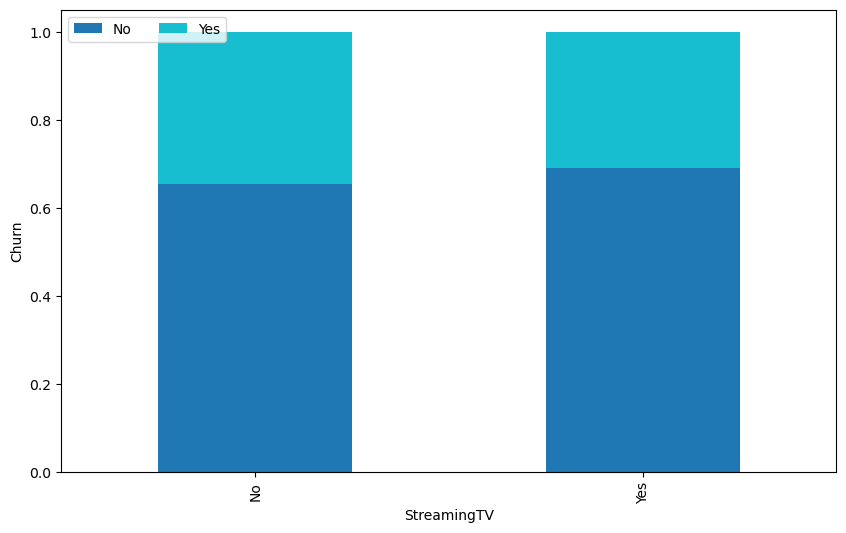

In [26]:
tabs_StreamingTV=pd.crosstab(index=df['StreamingTV'],columns=df['Churn'],normalize='index')
tabs_StreamingTV.plot(kind='bar',stacked=True,colormap='tab10',figsize=(10,6))
plt.legend(loc='upper left',ncol=2)
plt.xlabel('StreamingTV')
plt.ylabel('Churn')

Text(0, 0.5, 'Churn')

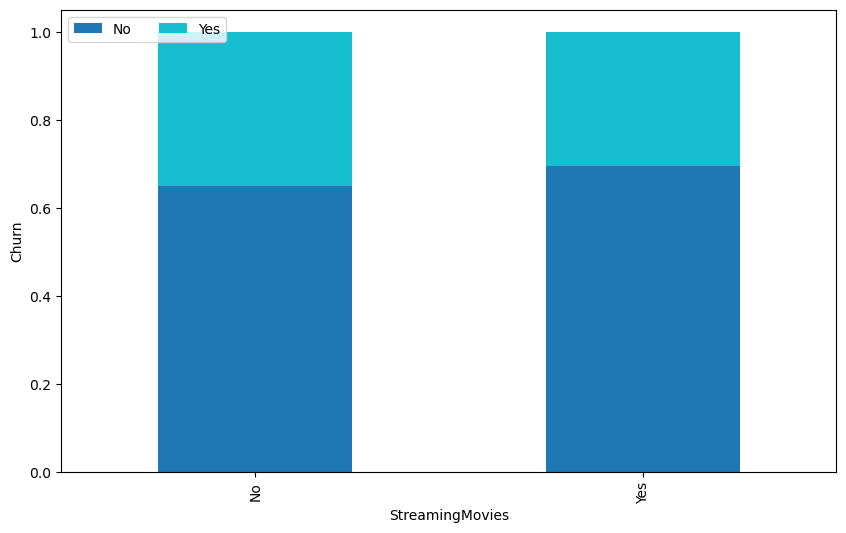

In [27]:
tabs_StreamingMovies=pd.crosstab(index=df['StreamingMovies'],columns=df['Churn'],normalize='index')
tabs_StreamingMovies.plot(kind='bar',stacked=True,colormap='tab10',figsize=(10,6))
plt.legend(loc='upper left',ncol=2)
plt.xlabel('StreamingMovies')
plt.ylabel('Churn')

Text(0, 0.5, 'Churn')

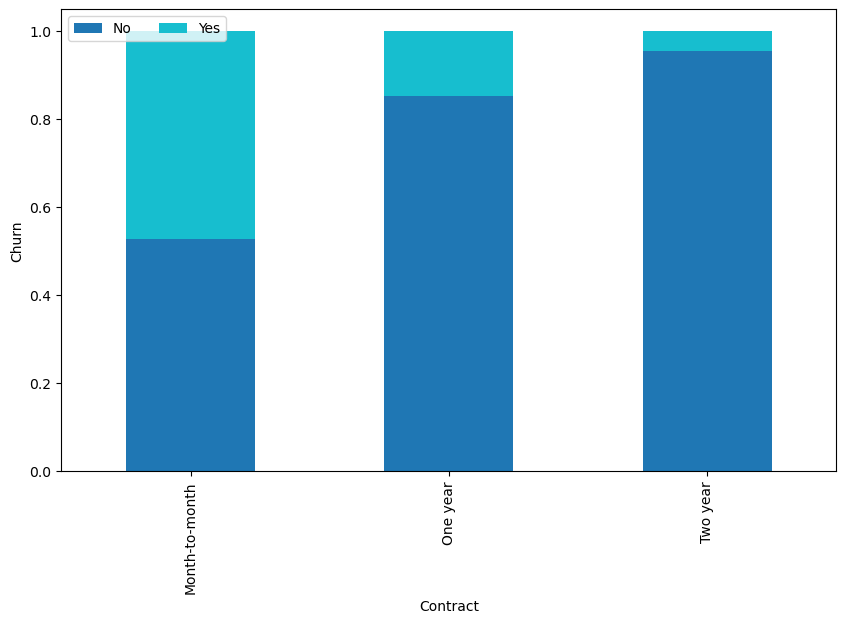

In [28]:
tabs_Contract=pd.crosstab(index=df['Contract'],columns=df['Churn'],normalize='index')
tabs_Contract.plot(kind='bar',stacked=True,colormap='tab10',figsize=(10,6))
plt.legend(loc='upper left',ncol=2)
plt.xlabel('Contract')
plt.ylabel('Churn')

Text(0, 0.5, 'Churn')

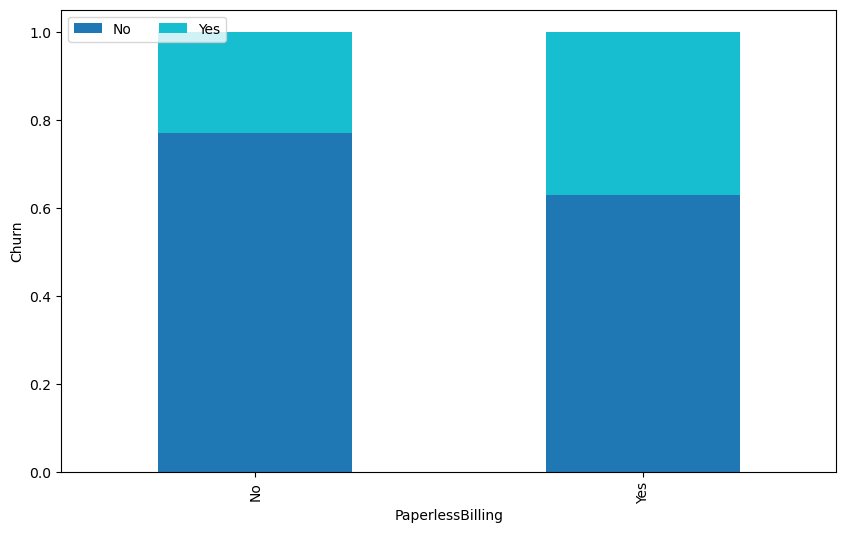

In [29]:
tabs_PaperlessBilling=pd.crosstab(index=df['PaperlessBilling'],columns=df['Churn'],normalize='index')
tabs_PaperlessBilling.plot(kind='bar',stacked=True,colormap='tab10',figsize=(10,6))
plt.legend(loc='upper left',ncol=2)
plt.xlabel('PaperlessBilling')
plt.ylabel('Churn')

Text(0, 0.5, 'Churn')

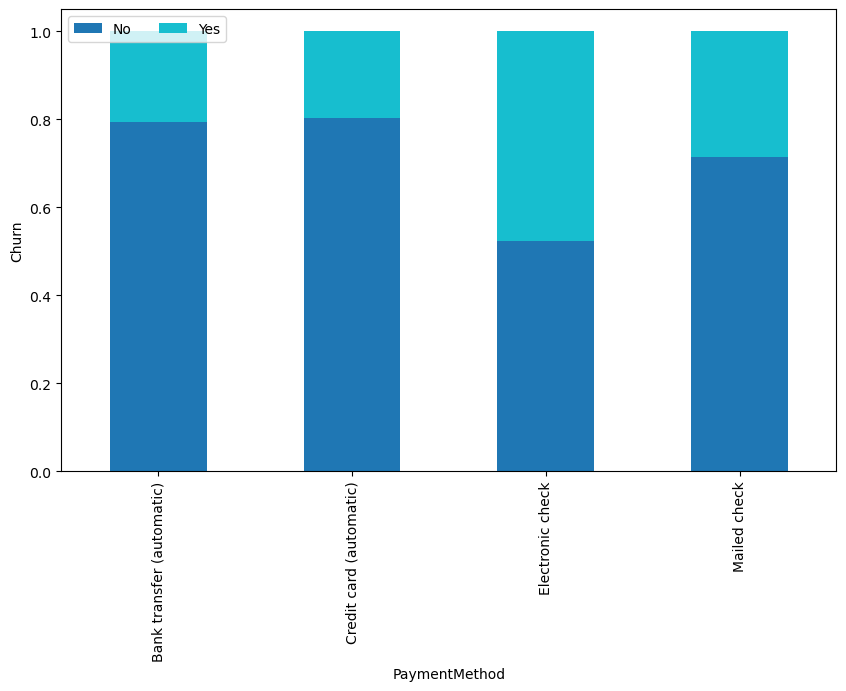

In [30]:
tabs_PaymentMethod=pd.crosstab(index=df['PaymentMethod'],columns=df['Churn'],normalize='index')
tabs_PaymentMethod.plot(kind='bar',stacked=True,colormap='tab10',figsize=(10,6))
plt.legend(loc='upper left',ncol=2)
plt.xlabel('PaymentMethod')
plt.ylabel('Churn')

In [4]:
df['Churn']=df['Churn'].replace("Yes","1",regex=True)
df['Churn']=df['Churn'].replace("No","0",regex=True)

df['gender']=df['gender'].replace("Female","0",regex=True)
df['gender']=df['gender'].replace("Male","1",regex=True)

df['Partner']=df['Partner'].replace("Yes","1",regex=True)
df['Partner']=df['Partner'].replace("No","0",regex=True)

df['Dependents']=df['Dependents'].replace("Yes","1",regex=True)
df['Dependents']=df['Dependents'].replace("No","0",regex=True)

df['PaperlessBilling']=df['PaperlessBilling'].replace("Yes","1",regex=True)
df['PaperlessBilling']=df['PaperlessBilling'].replace("No","0",regex=True)

df['MultipleLines']=df["MultipleLines"].replace("Yes","1",regex=True)
df['MultipleLines']=df["MultipleLines"].replace("No","0",regex=True)

df['OnlineSecurity']=df["OnlineSecurity"].replace("Yes","1",regex=True)
df['OnlineSecurity']=df["OnlineSecurity"].replace("No","0",regex=True)

df['OnlineBackup']=df["OnlineBackup"].replace("Yes","1",regex=True)
df['OnlineBackup']=df["OnlineBackup"].replace("No","0",regex=True)

df['DeviceProtection']=df["DeviceProtection"].replace("Yes","1",regex=True)
df['DeviceProtection']=df["DeviceProtection"].replace("No","0",regex=True)

df['TechSupport']=df["TechSupport"].replace("Yes","1",regex=True)
df['TechSupport']=df["TechSupport"].replace("No","0",regex=True)

df['StreamingTV']=df["StreamingTV"].replace("Yes","1",regex=True)
df['StreamingTV']=df["StreamingTV"].replace("No","0",regex=True)

df['StreamingMovies']=df["StreamingMovies"].replace("Yes","1",regex=True)
df['StreamingMovies']=df["StreamingMovies"].replace("No","0",regex=True)

df['DSL']=df["InternetService"].replace("DSL","1",regex=True)
df['DSL']=df["InternetService"].replace("Fiber optic","0",regex=True)

In [5]:
# dummy encoding
df['Contract'] = df['Contract'].astype('category')
cat_variables = df[['Contract']]
cat_dummies = pd.get_dummies(cat_variables)
cat_dummies.drop(columns=['Contract_Two year'] , inplace =True)
cat_dummies.head()
df['Contract_Month-to-month'] = cat_dummies['Contract_Month-to-month']
df.drop(columns=['Contract'] , inplace =True)

In [9]:
df['PaymentMethod']=df['PaymentMethod'].astype('category')
df_payment=df[['PaymentMethod']]
payment_dummies=pd.get_dummies(df_payment)
df['Bank']=payment_dummies['PaymentMethod_Bank transfer (automatic)']
df['Credit']=payment_dummies['PaymentMethod_Credit card (automatic)']
df['Electronic_check']=payment_dummies['PaymentMethod_Electronic check']
df.drop(columns=['PaymentMethod'],inplace=True)

In [10]:
df.drop(columns="customerID",inplace=True)

In [19]:
df_gender=pd.get_dummies(df['gender'],prefix='gender')
df['gender']=df_gender['gender_1']
df_senior=pd.get_dummies(df['SeniorCitizen'],prefix="sen")
df_senior
df['SeniorCitizen']=df_senior['sen_1']
df_Partner=pd.get_dummies(df['Partner'],prefix="Partner")
df_Partner
df['Partner']=df_Partner['Partner_1']
df_Dependents=pd.get_dummies(df['Dependents'],prefix="Dependents")
df_Dependents
df['Dependents']=df_Dependents['Dependents_1']
df_MultipleLines=pd.get_dummies(df['MultipleLines'],prefix="MultipleLines")
df_MultipleLines
df['MultipleLines']=df_MultipleLines['MultipleLines_1']
df_OnlineSecurity=pd.get_dummies(df['OnlineSecurity'],prefix="OnlineSecurity")
df_OnlineSecurity
df['OnlineSecurity']=df_OnlineSecurity['OnlineSecurity_1']
df_OnlineBackup=pd.get_dummies(df['OnlineBackup'],prefix="OnlineBackup")
df_OnlineBackup
df['OnlineBackup']=df_OnlineBackup['OnlineBackup_1']
df_DeviceProtection=pd.get_dummies(df['DeviceProtection'],prefix="DeviceProtection")
df_DeviceProtection
df['DeviceProtection']=df_DeviceProtection['DeviceProtection_1']
df_TechSupport=pd.get_dummies(df['TechSupport'],prefix="TechSupport")
df_TechSupport
df['TechSupport']=df_TechSupport['TechSupport_1']
df_StreamingTV=pd.get_dummies(df['StreamingTV'],prefix="StreamingTV")
df_StreamingTV
df['StreamingTV']=df_StreamingTV['StreamingTV_1']
df_StreamingMovies=pd.get_dummies(df['StreamingMovies'],prefix="StreamingMovies")
df_StreamingMovies
df['StreamingMovies']=df_StreamingMovies['StreamingMovies_1']
df_PaperlessBilling=pd.get_dummies(df['PaperlessBilling'],prefix="PaperlessBilling")
df['PaperlessBilling']=df_PaperlessBilling['PaperlessBilling_1']
df_Churn=pd.get_dummies(df['Churn'],prefix="Churn")
df['Churn']=df_Churn['Churn_1']


In [22]:
df['DSL']=df['DSL'].replace('DSL','1',regex=True)
df_DSL=pd.get_dummies(df['DSL'],prefix="DSL")
df['DSL']=df_DSL['DSL_1']

In [23]:
Columns=df.columns

In [24]:
for i in Columns:
    print(i,df[i].unique())

gender [1 0]
SeniorCitizen [0 1]
Partner [0 1]
Dependents [0 1]
tenure [34  2  8 22 28 62 13 58 49 25 69 71 10 21 30 47 72 17 27  1  5 46 11 70
 63 52 43 15 60 18 66  9  3 31 64 56  7 42 35 65 12 38 68 55 37 33 67 23
 61 14 16 20 53  4 40  6 59 44 19 54 50 41 51 32 57 45 24 29 48 36 39 26]
MultipleLines [0 1]
OnlineSecurity [1 0]
OnlineBackup [0 1]
DeviceProtection [1 0]
TechSupport [0 1]
StreamingTV [0 1]
StreamingMovies [0 1]
PaperlessBilling [0 1]
MonthlyCharges [ 56.95  53.85  70.7  ... 108.35  44.2   78.7 ]
TotalCharges [1889.5   108.15  151.65 ... 7362.9   306.6  6844.5 ]
numAdminTickets [0 1 5 3 4 2]
numTechTickets [0 2 4 3 1 6 5 7 8]
Churn [0 1]
DSL [1 0]
Contract_Month-to-month [0 1]
Bank [0 1]
Credit [0 1]
Electronic_check [0 1]


In [14]:
df.drop(columns=['InternetService'],inplace=True)

In [58]:
Columns=df.columns

In [59]:
for i in Columns:
    print(i,df[i].unique())

gender ['1' '0']
SeniorCitizen [0 1]
Partner ['0' '1']
Dependents ['0' '1']
tenure [34  2  8 22 28 62 13 58 49 25 69 71 10 21 30 47 72 17 27  1  5 46 11 70
 63 52 43 15 60 18 66  9  3 31 64 56  7 42 35 65 12 38 68 55 37 33 67 23
 61 14 16 20 53  4 40  6 59 44 19 54 50 41 51 32 57 45 24 29 48 36 39 26]
MultipleLines ['0' '1']
OnlineSecurity ['1' '0']
OnlineBackup ['0' '1']
DeviceProtection ['1' '0']
TechSupport ['0' '1']
StreamingTV ['0' '1']
StreamingMovies ['0' '1']
PaperlessBilling ['0' '1']
MonthlyCharges [ 56.95  53.85  70.7  ... 108.35  44.2   78.7 ]
TotalCharges [1889.5   108.15  151.65 ... 7362.9   306.6  6844.5 ]
numAdminTickets [0 1 5 3 4 2]
numTechTickets [0 2 4 3 1 6 5 7 8]
Churn ['0' '1']
DSL ['DSL' '0']
Contract_Month-to-month [0 1]
Credit [0 1]
Bank [0 1]
Electronic [0 1]


In [60]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn,DSL,Contract_Month-to-month,Credit,Bank,Electronic
0,1,0,0,0,34,0,1,0,1,0,...,56.95,1889.50,0,0,0,DSL,0,0,0,0
1,1,0,0,0,2,0,1,1,0,0,...,53.85,108.15,0,0,1,DSL,1,0,0,0
2,0,0,0,0,2,0,0,0,0,0,...,70.70,151.65,0,0,1,0,1,0,0,1
3,0,0,0,0,8,1,0,0,1,0,...,99.65,820.50,0,0,1,0,1,0,0,1
4,1,0,0,1,22,1,0,1,0,0,...,89.10,1949.40,0,0,0,0,1,1,0,0


In [61]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'numAdminTickets', 'numTechTickets',
       'Churn', 'DSL', 'Contract_Month-to-month', 'Credit', 'Bank',
       'Electronic'],
      dtype='object')

## Model Building

In [100]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn,DSL,Mail,Bank,Electronic
0,1,0,0,0,34,0,1,0,1,0,0,0,0,0,56.95,1889.50,0,0,0,1,1,0,0
1,1,0,0,0,2,0,1,1,0,0,0,0,1,1,53.85,108.15,0,0,1,1,1,0,0
2,0,0,0,0,2,0,0,0,0,0,0,0,1,1,70.70,151.65,0,0,1,0,0,0,1
3,0,0,0,0,8,1,0,0,1,0,1,1,1,1,99.65,820.50,0,0,1,0,0,0,1
4,1,0,0,1,22,1,0,1,0,0,1,0,1,1,89.10,1949.40,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4830,1,0,0,0,19,0,0,0,0,0,1,0,1,1,78.70,1495.10,0,0,0,0,0,1,0
4831,1,0,1,1,24,1,1,0,1,1,1,1,0,1,84.80,1990.50,0,0,0,1,1,0,0
4832,0,0,1,1,72,1,0,1,1,0,1,1,0,1,103.20,7362.90,0,5,0,0,0,0,0
4833,1,1,1,0,4,1,0,0,0,0,0,0,1,1,74.40,306.60,0,0,1,0,1,0,0


In [103]:
#df.drop(columns='TotalCharges',inplace=True)

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4835 entries, 0 to 4834
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            4835 non-null   uint8  
 1   SeniorCitizen     4835 non-null   uint8  
 2   Partner           4835 non-null   uint8  
 3   Dependents        4835 non-null   uint8  
 4   tenure            4835 non-null   int64  
 5   MultipleLines     4835 non-null   uint8  
 6   OnlineSecurity    4835 non-null   uint8  
 7   OnlineBackup      4835 non-null   uint8  
 8   DeviceProtection  4835 non-null   uint8  
 9   TechSupport       4835 non-null   uint8  
 10  StreamingTV       4835 non-null   uint8  
 11  StreamingMovies   4835 non-null   uint8  
 12  Contract          4835 non-null   uint8  
 13  PaperlessBilling  4835 non-null   uint8  
 14  MonthlyCharges    4835 non-null   float64
 15  numAdminTickets   4835 non-null   int64  
 16  numTechTickets    4835 non-null   int64  


In [25]:
X=df.loc[:,df.columns!="Churn"] 
y=df.loc[:,df.columns=="Churn"]

In [58]:
y = column_or_1d(y, warn=True)
X = sm.add_constant(X)

In [59]:
X.dtypes

const                      float64
gender                       uint8
SeniorCitizen                uint8
Partner                      uint8
Dependents                   uint8
tenure                       int64
MultipleLines                uint8
OnlineSecurity               uint8
OnlineBackup                 uint8
DeviceProtection             uint8
TechSupport                  uint8
StreamingTV                  uint8
StreamingMovies              uint8
PaperlessBilling             uint8
MonthlyCharges             float64
TotalCharges               float64
numAdminTickets              int64
numTechTickets               int64
DSL                          uint8
Contract_Month-to-month      uint8
Bank                         uint8
Credit                       uint8
Electronic_check             uint8
dtype: object

In [60]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

In [61]:
model=sm.Logit(y_train,X_train)
res=model.fit()

Optimization terminated successfully.
         Current function value: inf
         Iterations 8


C:\Users\Compu Tech\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\Compu Tech\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


In [62]:
coefficients = res.params
odds_ratios = np.exp(coefficients)

In [63]:
print(odds_ratios)

const                      11.760725
gender                      0.848173
SeniorCitizen               1.214828
Partner                     0.791935
Dependents                  1.044227
tenure                      0.969316
MultipleLines               1.784562
OnlineSecurity              0.669230
OnlineBackup                0.828604
DeviceProtection            1.013057
TechSupport                 0.950079
StreamingTV                 1.320042
StreamingMovies             1.489285
PaperlessBilling            1.351692
MonthlyCharges              0.964730
TotalCharges                0.999325
numAdminTickets             0.977260
numTechTickets              4.638233
DSL                         0.141511
Contract_Month-to-month     2.676793
Bank                        1.222366
Credit                      1.062926
Electronic_check            1.405319
dtype: float64


In [64]:
res.summary2()

C:\Users\Compu Tech\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\Compu Tech\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\Compu Tech\anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Compu Tech\anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
=======================================================================
Model:                  Logit               Pseudo R-squared:    inf   
Dependent Variable:     y                   AIC:                 inf   
Date:                   2023-08-25 23:46    BIC:                 inf   
No. Observations:       3865                Log-Likelihood:      -inf  
Df Model:               22                  LL-Null:             0.0000
Df Residuals:           3842                LLR p-value:         1.0000
Converged:              1.0000              Scale:               1.0000
No. Iterations:         8.0000                                         
-----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
const                    2.4648   3.3921  0.7266 0.4675 -4.1836  9.1131
gender                  -0.1647   0.0984 -1.6727 0.0944 -0.3576  0.0283
SeniorCitizen            0.1946   0.1269  1.5331 0.1252 -0.0542  0.4434
Partner                 -0.2333   0.1197 -1.9482 0.0514 -0.4680  0.0014
Dependents               0.0433   0.1410  0.3068 0.7590 -0.2332  0.3197
tenure                  -0.0312   0.0143 -2.1748 0.0296 -0.0593 -0.0031
MultipleLines            0.5792   0.2648  2.1874 0.0287  0.0602  1.0981
OnlineSecurity          -0.4016   0.2718 -1.4775 0.1395 -0.9344  0.1311
OnlineBackup            -0.1880   0.2651 -0.7092 0.4782 -0.7076  0.3316
DeviceProtection         0.0130   0.2675  0.0485 0.9613 -0.5113  0.5372
TechSupport             -0.0512   0.2749 -0.1863 0.8522 -0.5900  0.4876
StreamingTV              0.2777   0.4930  0.5632 0.5733 -0.6886  1.2439
StreamingMovies          0.3983   0.4996  0.7973 0.4253 -0.5808  1.3774
PaperlessBilling         0.3014   0.1116  2.6993 0.0069  0.0825  0.5202
MonthlyCharges          -0.0359   0.0483 -0.7436 0.4571 -0.1305  0.0587
TotalCharges            -0.0007   0.0002 -3.9179 0.0001 -0.0010 -0.0003
numAdminTickets         -0.0230   0.0385 -0.5978 0.5500 -0.0984  0.0524
numTechTickets           1.5343   0.0688 22.2997 0.0000  1.3995  1.6692
DSL                     -1.9554   1.2107 -1.6150 0.1063 -4.3284  0.4176
Contract_Month-to-month  0.9846   0.2112  4.6615 0.0000  0.5706  1.3986
Bank                     0.2008   0.1789  1.1222 0.2618 -0.1499  0.5515
Credit                   0.0610   0.1795  0.3399 0.7339 -0.2908  0.4129
Electronic_check         0.3403   0.1429  2.3808 0.0173  0.0601  0.6204
=======================================================================

"""

In [71]:
sig_columns=['gender','SeniorCitizen','tenure','MultipleLines','Electronic_check','Credit','Bank',
               'Contract_Month-to-month','numTechTickets',
              'TotalCharges','PaperlessBilling']
X=df[sig_columns]


In [72]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)
model=sm.Logit(y_train,X_train)
res=model.fit()
coefficients = res.params
odds_ratios = np.exp(coefficients)

Optimization terminated successfully.
         Current function value: inf
         Iterations 8


C:\Users\Compu Tech\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\Compu Tech\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


In [73]:
res.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
=======================================================================
Model:                  Logit               Pseudo R-squared:    inf   
Dependent Variable:     y                   AIC:                 inf   
Date:                   2023-08-25 23:58    BIC:                 inf   
No. Observations:       3865                Log-Likelihood:      -inf  
Df Model:               10                  LL-Null:             0.0000
Df Residuals:           3854                LLR p-value:         1.0000
Converged:              1.0000              Scale:               1.0000
No. Iterations:         8.0000                                         
-----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
gender                  -0.2776   0.0927 -2.9946 0.0027 -0.4592 -0.0959
SeniorCitizen            0.4058   0.1204  3.3711 0.0007  0.1698  0.6417
tenure                  -0.0916   0.0116 -7.8693 0.0000 -0.1144 -0.0688
MultipleLines            0.5116   0.1065  4.8041 0.0000  0.3029  0.7203
Electronic_check         0.3582   0.1249  2.8688 0.0041  0.1135  0.6029
Credit                  -0.1358   0.1615 -0.8409 0.4004 -0.4523  0.1807
Bank                     0.0314   0.1603  0.1957 0.8448 -0.2829  0.3456
Contract_Month-to-month  0.4543   0.1153  3.9397 0.0001  0.2283  0.6804
numTechTickets           1.4114   0.0621 22.7295 0.0000  1.2897  1.5331
TotalCharges            -0.0001   0.0001 -0.9507 0.3417 -0.0004  0.0001
PaperlessBilling         0.2970   0.1027  2.8927 0.0038  0.0958  0.4983
=======================================================================

"""

In [77]:
clf=LogisticRegression(random_state=100,max_iter=500)
clf.fit(X_train,y_train)

LogisticRegression(max_iter=500, random_state=100)

In [78]:
y_pred=clf.predict(X_test)

In [79]:
print ("Accuracy is "), accuracy_score(y_test,y_pred)*100

Accuracy is 


(None, 81.38572905894519)

In [81]:
r_probs = [0 for _ in range(len(y_test))]
D_probs = clf.predict_proba(X_test)
D_probs = D_probs[:, 1]
r_auc = roc_auc_score(y_test, r_probs)
D_auc = roc_auc_score(y_test, D_probs)

In [88]:
print('Random (chance) Prediction: AUC = %.3f' % (r_auc))
print('Logistic Regression: AUC = %.3f' % (D_auc))

Random (chance) Prediction: AUC = 0.500
Logistic Regression: AUC = 0.906


In [84]:
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
D_fpr, D_tpr, _ = roc_curve(y_test, D_probs)

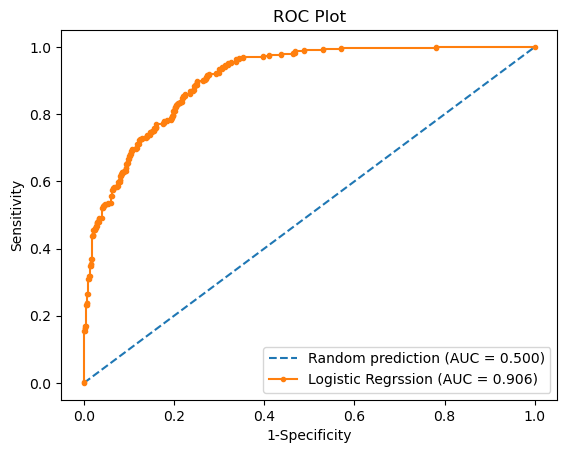

In [85]:
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUC = %0.3f)' % r_auc)
plt.plot(D_fpr, D_tpr, marker='.', label='Logistic Regrssion (AUC = %0.3f)' % D_auc)
plt.title('ROC Plot')
# Axis labels
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
# Show legend
plt.legend() # 
# Show plot
plt.show()

In [89]:
recall_score(y_test,y_pred)

0.7694915254237288

In [90]:
precision_score(y_test,y_pred)

0.6696165191740413

In [91]:
cm=metrics.confusion_matrix(y_test, y_pred)

In [92]:
specificity=cm[0,0]/(cm[0,0]+cm[0,1])

In [93]:
print(specificity)

0.8333333333333334
